## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing


## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

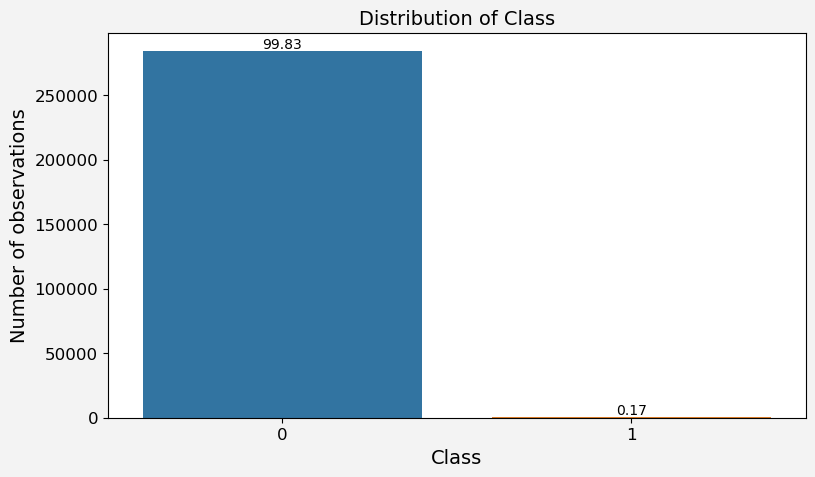

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
total = float(len(df)) 
ax = sns.countplot(x="Class",  data=df)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distribution of Class', fontsize =14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(100*height/total), 
            ha="center",va='bottom')
ax.grid(False)
plt.tick_params(labelsize=12)
plt.show();

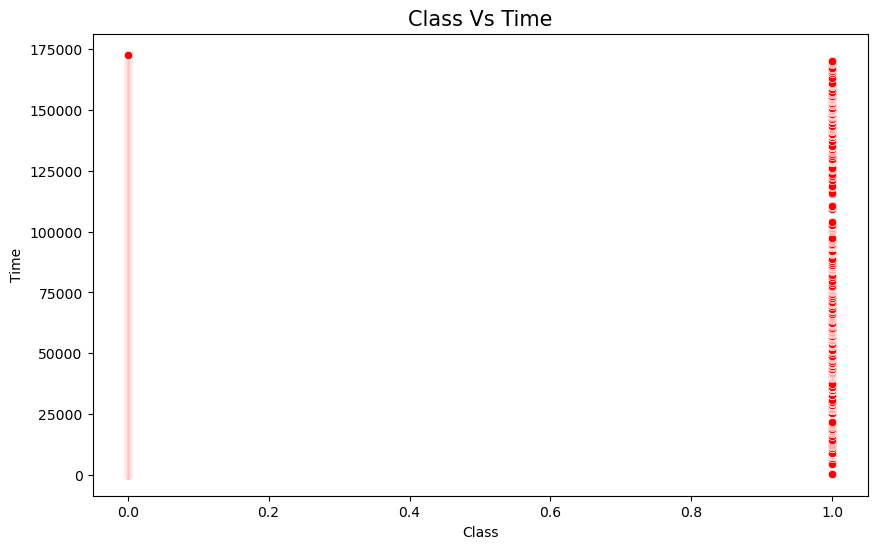

In [7]:
# Create a scatter plot to observe the distribution of classes with time
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df['Class'], y=df['Time'], ax=ax, color='red')
ax.set_title('Class Vs Time', fontsize=15)
plt.show()

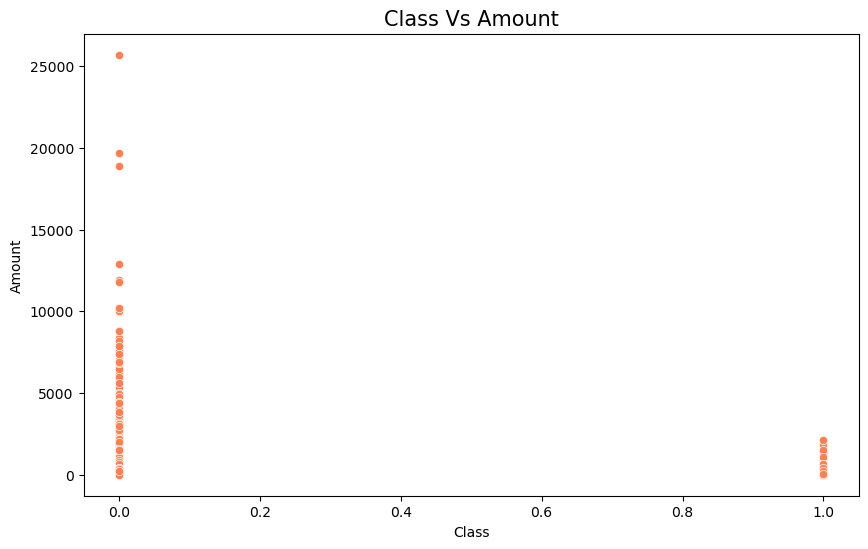

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=df['Class'], y=df['Amount'], ax=ax, color='coral')
ax.set_title('Class Vs Amount', fontsize=15)
plt.show()

C:\Users\bitzc\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


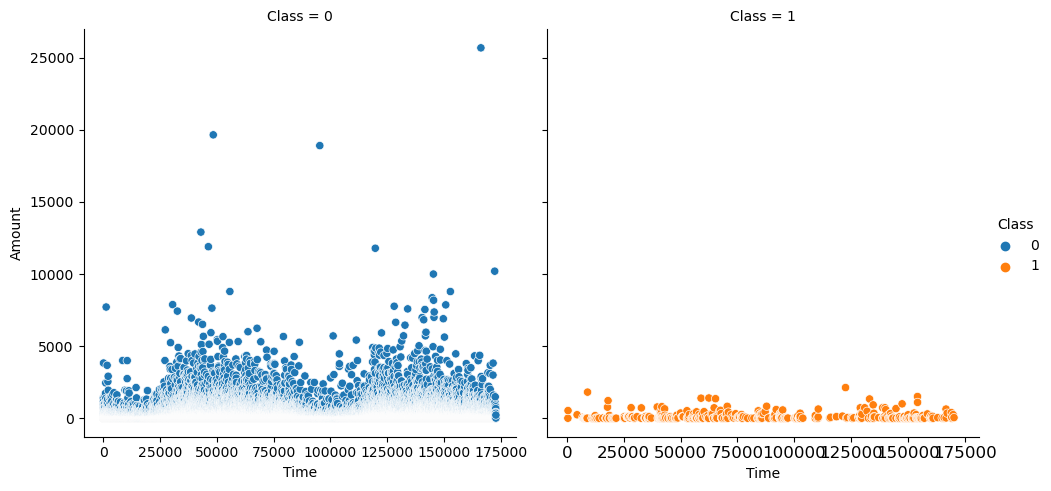

In [9]:
# Creating a scatter plot to observe the distribution of classes with Amount & Time together for more insightes
ax=sns.relplot(x="Time", y="Amount",
                 col="Class", hue="Class",
                 kind="scatter", data=df)
plt.tick_params(labelsize=12)

### <I>Seems Fradulent transaction happens for less amounts (> 5000).</I>

In [10]:
# Drop unnecessary columns
df = df.drop('Time', axis=1)

### Splitting the data into train & test data

In [11]:
y = df['Class']
X = df.drop('Class', axis=1)

In [12]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [13]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


In [14]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,0.079128,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,-0.654029,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,-0.212753,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,-0.027572,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


### Plotting the distribution of a variable

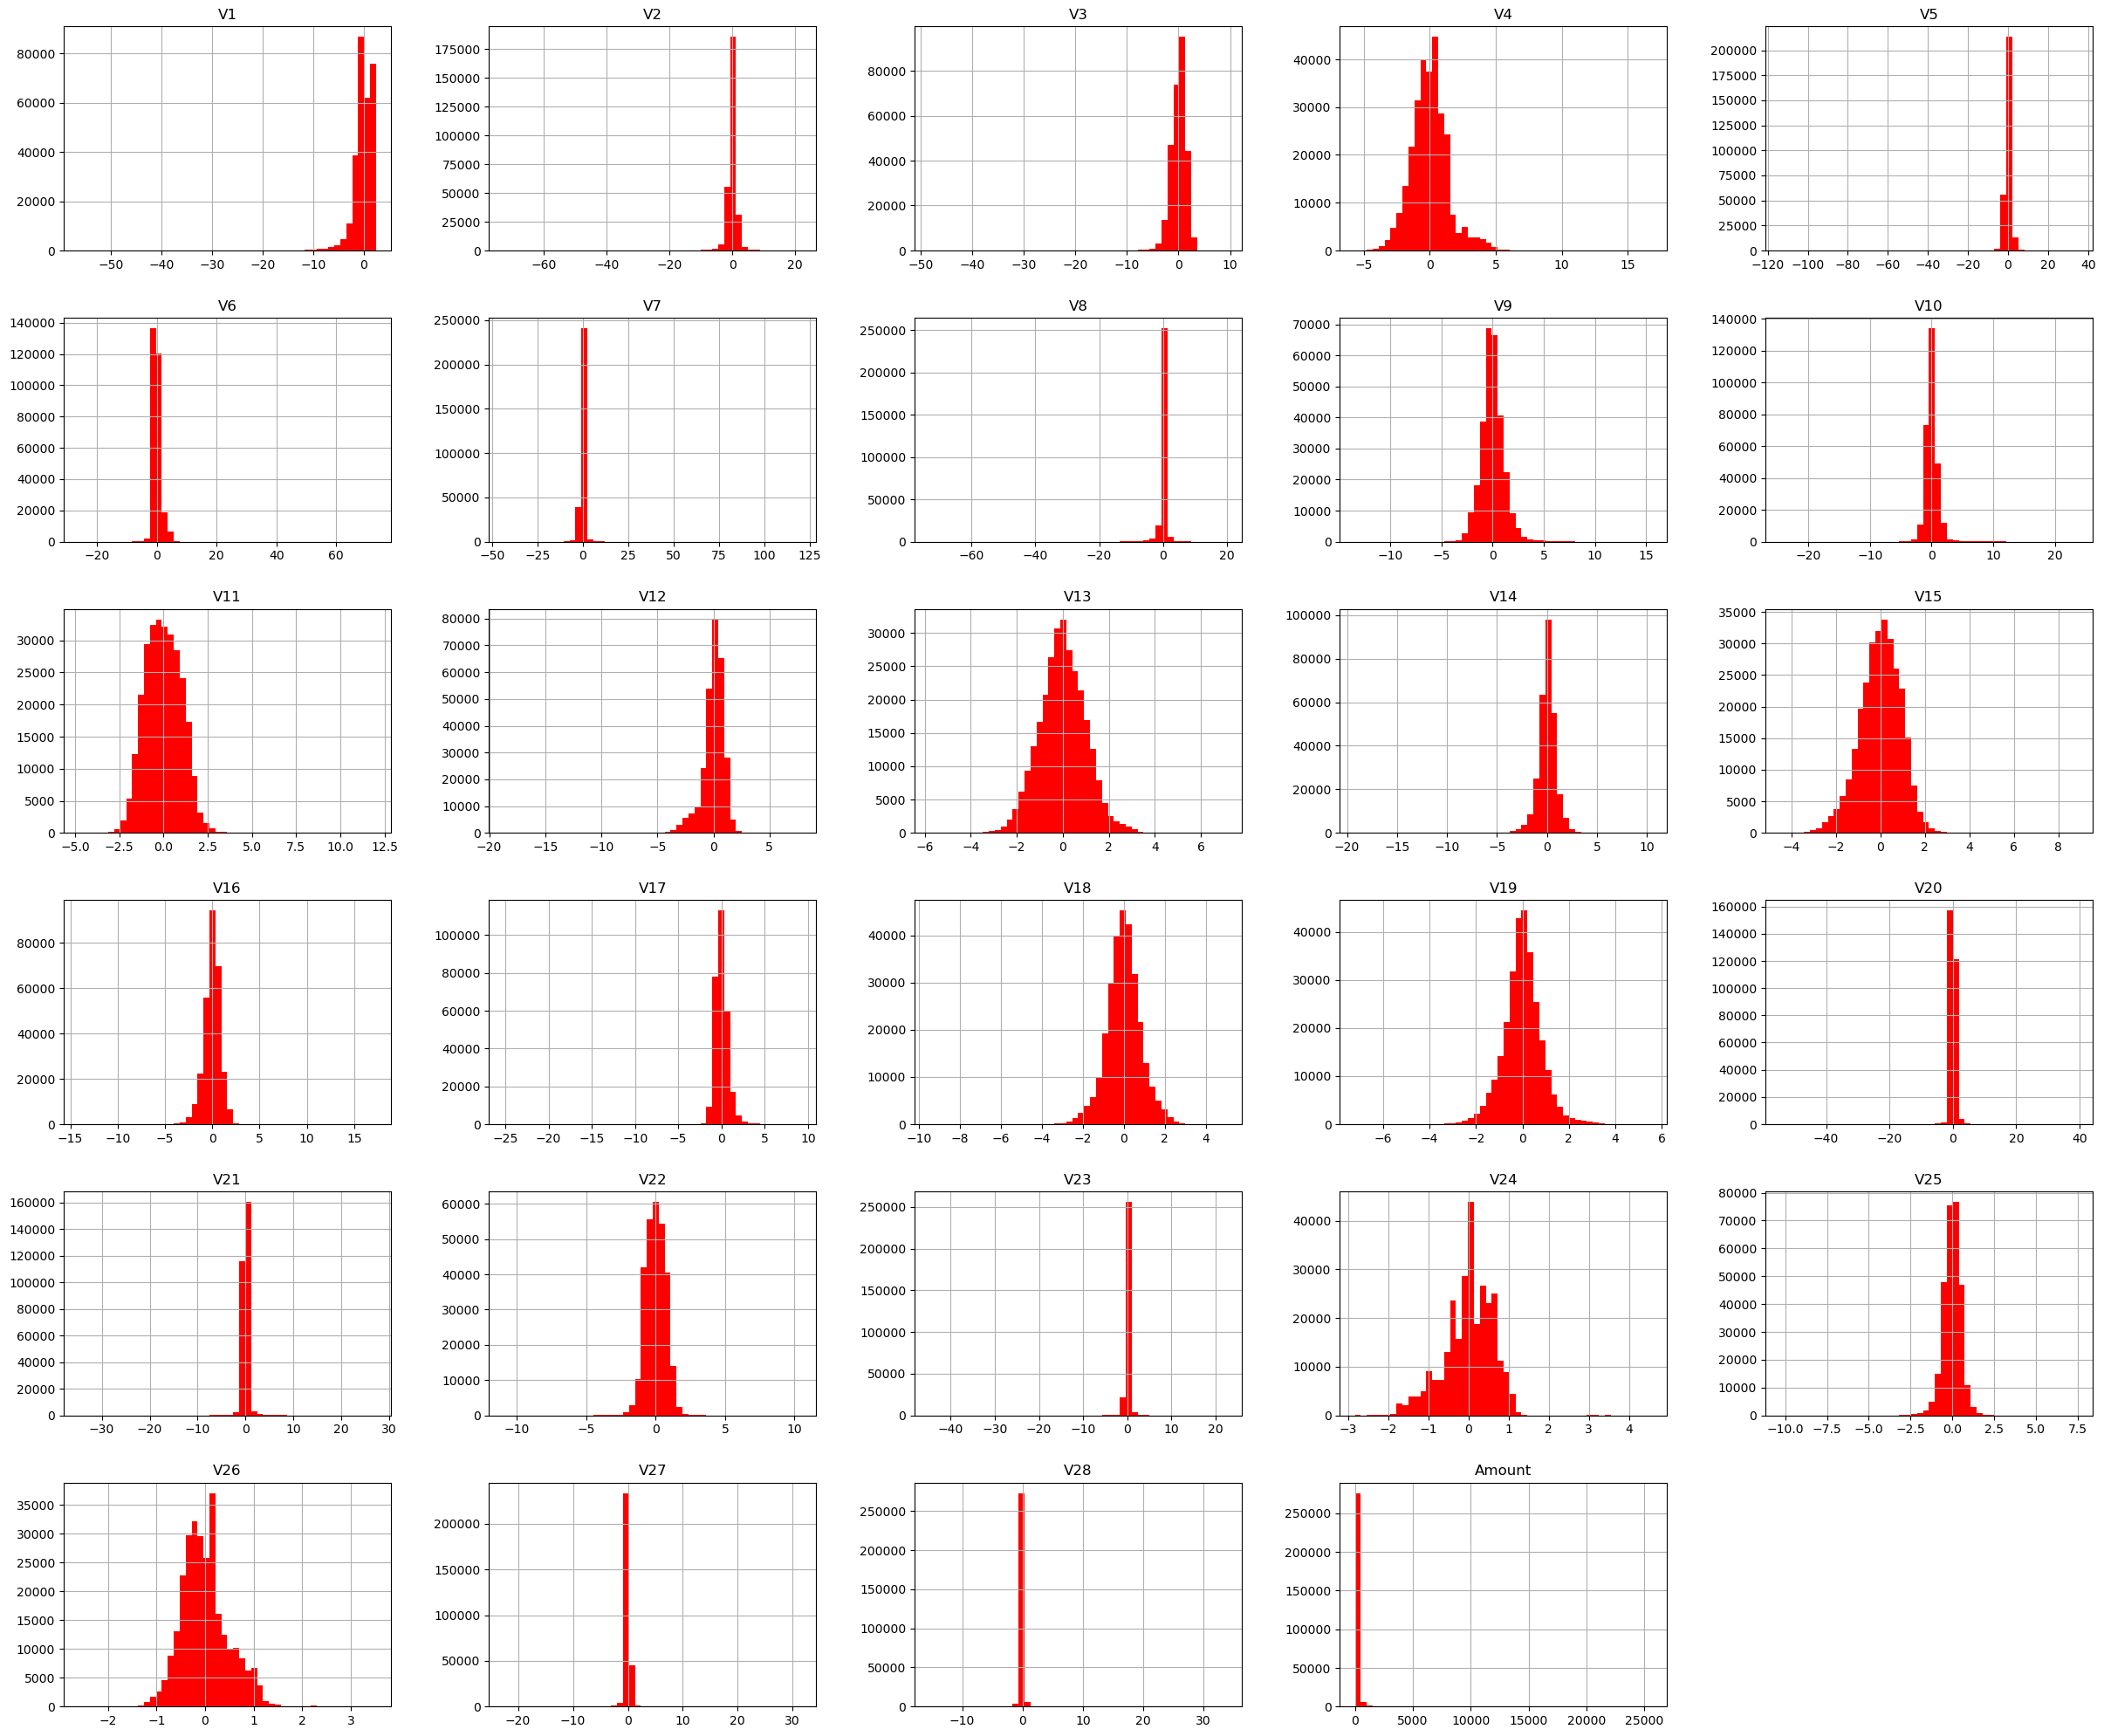

In [15]:
X.hist(bins = 50, figsize = (30,25), color = 'red')
plt.show()

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [16]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = preprocessing.PowerTransformer(copy=False)
cols = X_train.columns
pt.fit(X_train)
X_train = pt.transform(X_train)
X_test = pt.transform(X_test)
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.344520,-0.325497,-0.366496,0.309002,-0.379435,0.042402,-0.503688,-0.042169,0.966396,0.016651,...,-0.165300,0.346431,1.357950,0.073581,-0.545065,-0.123690,-0.387154,0.103032,-0.135393,-0.427174
1,-0.479827,-0.472124,1.169181,-1.548951,-0.092018,0.242040,0.017986,-0.451461,0.090220,0.598148,...,-0.609582,-0.197074,0.570776,0.171592,-1.544396,-2.125397,0.803765,-0.925246,-0.441835,0.452605
2,-0.215881,0.487398,-0.519881,-0.458089,0.778488,-0.186912,0.634627,0.039213,-0.068625,-0.576153,...,0.012463,-0.426563,-1.192630,0.122639,0.158632,-0.839630,0.341186,0.510431,0.228384,-0.322827
3,-0.546347,0.632860,1.361333,1.803361,0.350040,0.824554,0.682533,-0.156411,0.386452,0.553735,...,-0.330824,0.106610,0.601657,-0.129915,0.723636,-1.236765,-0.304600,-0.242199,-0.190953,0.984757
4,-1.766911,1.330715,-0.439083,0.057120,-0.625014,-0.292893,-0.347967,1.405294,0.529428,1.121273,...,-0.019270,-0.666132,-0.335640,0.396529,0.014518,0.906829,0.586554,0.715554,-1.008476,0.119243


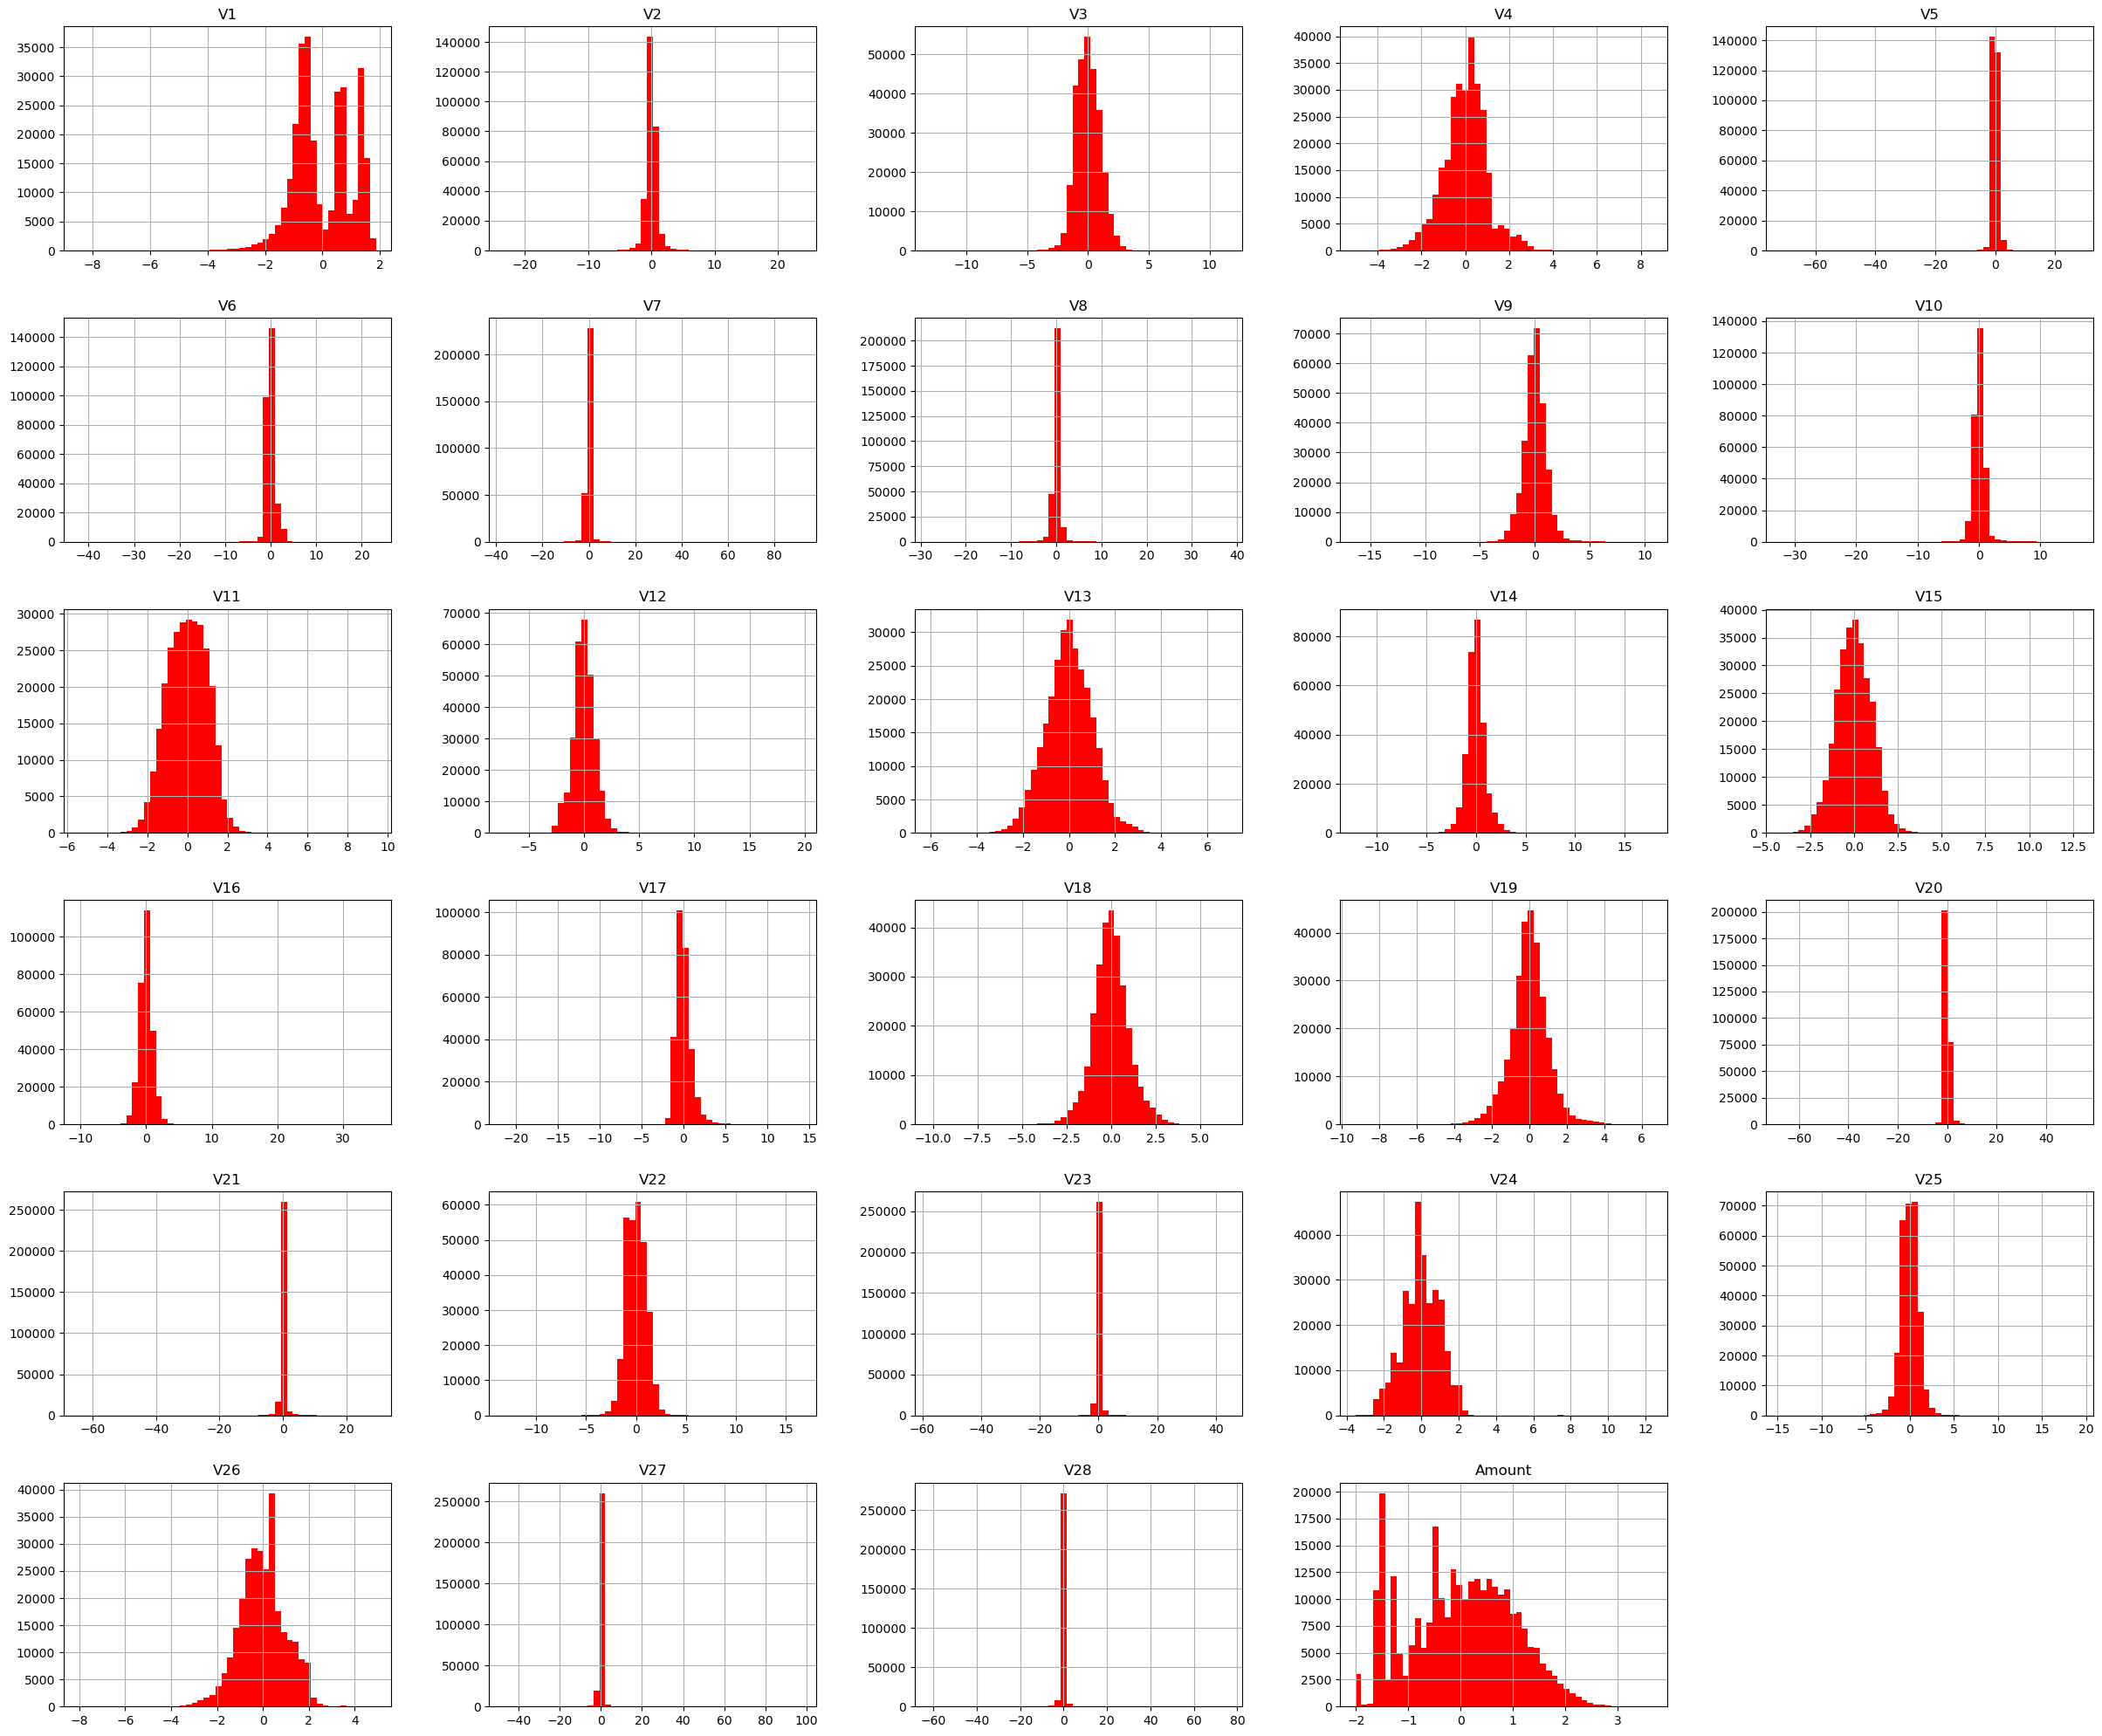

In [17]:
# plot the histogram of a variable from the dataset again to see the result 
X = pd.concat([X_train, X_test], axis=0)
X.hist(bins = 50, figsize = (30,25), color = 'red')
plt.show()

In [18]:
# Function to visualise cross-validation results
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

def show_cv_metrics(model, model_name=None):
    results = model.cv_results_

    auc = np.nanmean(results['mean_train_AUC'])
    precision = np.nanmean(results['mean_train_Precision'])
    recall = np.nanmean(results['mean_train_Recall'])
    val_auc = np.nanmean(results['mean_test_AUC'])
    val_precision = np.nanmean(results['mean_test_Precision'])
    val_recall = np.nanmean(results['mean_test_Recall'])
    if not model_name: 
        model_name = model.best_estimator_.__class__.__name__

    heading_length = 100
    print()
    print('='*heading_length)
    print(f'CROSS VALIDATION METRICS : {model_name}')
    print('='*heading_length)
    print(f'Train AUC         : {auc*100:.2f}% | Val AUC: {val_auc*100:.2f}%')
    print(f'Train Precision   : {precision*100:.2f}% | Val Precision: {val_precision*100:.2f}%')
    print(f'Train Recall      : {recall*100:.2f}% | Val Recall: {val_recall*100:.2f}%')
    print('-'*heading_length)
    print(f'Best Params       : {model.best_params_}')
    print(f'Best AUC Score    : {model.best_score_*100:.2f}%')
    print('='*heading_length)
    print()


# Function to visualise evalution results
def show_evaluation_metrics(fpr, tpr, auc_score, precision, recall, model_name):   
    # Plot ROC curve
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score*100:.2f}%)', linewidth=2, color='coral')
    plt.plot([0.0, 1.0], [0.0, 1.0], linestyle='dashed', linewidth=2, color='black', label='Random')
    ax.set_title('ROC Curve', fontsize=16, fontweight=2)
    ax.set(xlabel='FPR', ylabel='TPR', xlim=[-0.02, 1.0], ylim=[-0.02, 1.0]) 
    plt.legend(fontsize=14)
    plt.show()

    # Print other metrics
    print()
    print('='*100)
    print(f'EVALUATION METRICS : {model_name}')
    print('='*100)
    print(f'AUC       : {auc_score*100:.2f}%')
    print(f'Precision : {precision*100:.2f}%' )
    print(f'Recall    : {recall*100:.2f}%')
    print('='*100)


# Function to cross-validate the passed model.
def cross_validate_and_print_metrics(clf, X, y,  params, folds=5, verbose=False, model_name=None):
    metrics = {'AUC':make_scorer(roc_auc_score),
               'Precision': make_scorer(precision_score),
               'Recall':make_scorer(recall_score)}
    
    # Note that if cv is set to integer value and estimator is a classifier, which is the case here,
    # then sklearn uses StratifiedKFold splitting which we need for imbalanced dataset
    cv_model = GridSearchCV(estimator=clf, 
                            param_grid=params, 
                            cv=folds, 
                            scoring=metrics, 
                            refit='AUC',
                            return_train_score=True,
                            verbose=verbose, 
                            n_jobs=-1)
    cv_model.fit(X, y)
    show_cv_metrics(cv_model, model_name)
    return cv_model.best_params_

# Function to evalute the model on test data and generate performance metrics
def evaluate_and_print_metrics(clf, X_test, y_test, model_name=None):
    # Evaluate the performance of the model on the test set
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    y_pred = clf.predict(X_test)

    # Compute performance metrics
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    if not model_name: 
        model_name = clf.__class__.__name__
    # Show evaluation results
    show_evaluation_metrics(fpr, tpr, auc_score, precision, recall, model_name)
    return [clf, model_name, auc_score, precision, recall]

## Model Building
- Build different models on the imbalanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

## Logistic Regression

In [19]:
#perform cross validation
def build_logit_classifier(X_train, y_train, X_test, y_test, model_name=None):
    # Instantiate the Classifier and cross validate
    # [For below configuration ruuning on full dataset it takes around 16.1 min to finish on 4core i7/32Gb machine]
    clf = LogisticRegression(random_state=42)
    params = {'C':[1.0, 0.5, 0.25], 'solver': ['lbfgs', 'liblinear']}
    best_params = cross_validate_and_print_metrics(clf, X_train, y_train, params, 
                                                   verbose=1, model_name=model_name)

    # Now fit and evalute the model on test data with best parameters obtained using cross-validation  
    clf = LogisticRegression(**best_params, random_state=42).fit(X_train, y_train)
    metrics = evaluate_and_print_metrics(clf, X_test, y_test, model_name=model_name)

    return clf

Fitting 5 folds for each of 6 candidates, totalling 30 fits

CROSS VALIDATION METRICS : LogisticRegression
Train AUC         : 82.27% | Val AUC: 82.12%
Train Precision   : 88.50% | Val Precision: 88.16%
Train Recall      : 64.55% | Val Recall: 64.26%
----------------------------------------------------------------------------------------------------
Best Params       : {'C': 1.0, 'solver': 'liblinear'}
Best AUC Score    : 82.23%



C:\Users\bitzc\AppData\Local\Temp\ipykernel_5716\3143686792.py:47: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


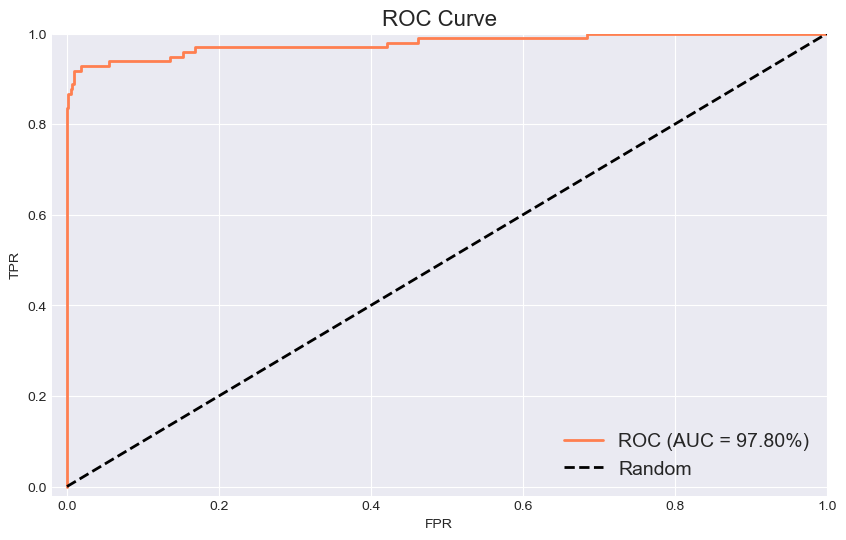


EVALUATION METRICS : LogisticRegression
AUC       : 97.80%
Precision : 87.14%
Recall    : 62.24%


In [20]:
clf_lr = build_logit_classifier(X_train, y_train, X_test, y_test, 'LogisticRegression')

### Similarly explore other algorithms by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

## Decision Tree

In [21]:
def build_decisiontree_classifier(X_train, y_train, X_test, y_test, model_name=None):
    # Instantiate the Classifier and cross validate 
    # [For below configuration ruuning on full dataset it takes around 4 min to finish on 4core i7/32Gb machine]
    clf = DecisionTreeClassifier(random_state=42)
    params = {'criterion':['gini', 'entropy'], 'max_depth': [5, 10, 20], 'min_samples_leaf': [2, 5, 7]}
    best_params = cross_validate_and_print_metrics(clf, X_train, y_train, params, 
                                                   verbose=1, model_name=model_name)

    # Now fit and evalute the model on test data with best parameters obtained using cross-validation  
    clf = DecisionTreeClassifier(**best_params, random_state=42).fit(X_train, y_train)
    metrics = evaluate_and_print_metrics(clf, X_test, y_test, model_name=model_name)

    return clf

Fitting 5 folds for each of 18 candidates, totalling 90 fits

CROSS VALIDATION METRICS : DecisionTreeClassifier
Train AUC         : 91.09% | Val AUC: 87.86%
Train Precision   : 95.84% | Val Precision: 88.27%
Train Recall      : 82.18% | Val Recall: 75.74%
----------------------------------------------------------------------------------------------------
Best Params       : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 5}
Best AUC Score    : 88.69%



C:\Users\bitzc\AppData\Local\Temp\ipykernel_5716\3143686792.py:47: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


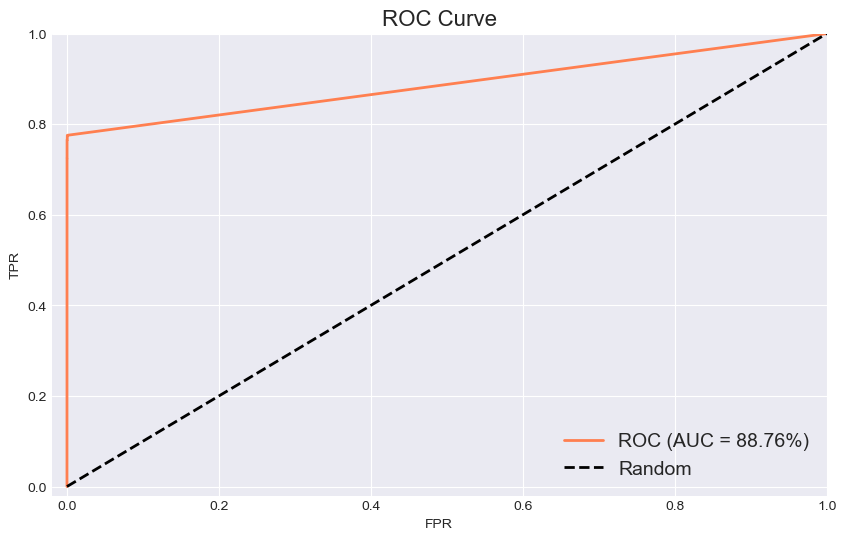


EVALUATION METRICS : DecisionTreeClassifier
AUC       : 88.76%
Precision : 88.24%
Recall    : 76.53%


In [22]:
clf_dt = build_decisiontree_classifier(X_train, y_train, X_test, y_test, 'DecisionTreeClassifier')


## Random Forest

In [23]:
def build_randomforest_classifier(X_train, y_train, X_test, y_test, model_name=None):
    # Instantiate the Classifier and cross validate
    # [For below configuration ruuning on full dataset it takes around 25 min to finish on 4core i7/32Gb machine]
    clf = RandomForestClassifier(random_state=42)
    params = {'n_estimators': [100, 200], 'max_depth': [5, 10], 'min_samples_leaf': [2, 5]}
    best_params = cross_validate_and_print_metrics(clf, X_train, y_train, params, 
                                                   verbose=1, model_name=model_name)

    # Now fit and evalute the model on test data with best parameters obtained using cross-validation  
    clf = RandomForestClassifier(**best_params, random_state=42).fit(X_train, y_train)
    metrics = evaluate_and_print_metrics(clf, X_test, y_test, model_name=model_name)

    return clf

Fitting 5 folds for each of 8 candidates, totalling 40 fits

CROSS VALIDATION METRICS : RandomForestClassifier
Train AUC         : 89.20% | Val AUC: 87.07%
Train Precision   : 96.03% | Val Precision: 92.19%
Train Recall      : 78.40% | Val Recall: 74.15%
----------------------------------------------------------------------------------------------------
Best Params       : {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 100}
Best AUC Score    : 88.45%



C:\Users\bitzc\AppData\Local\Temp\ipykernel_5716\3143686792.py:47: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


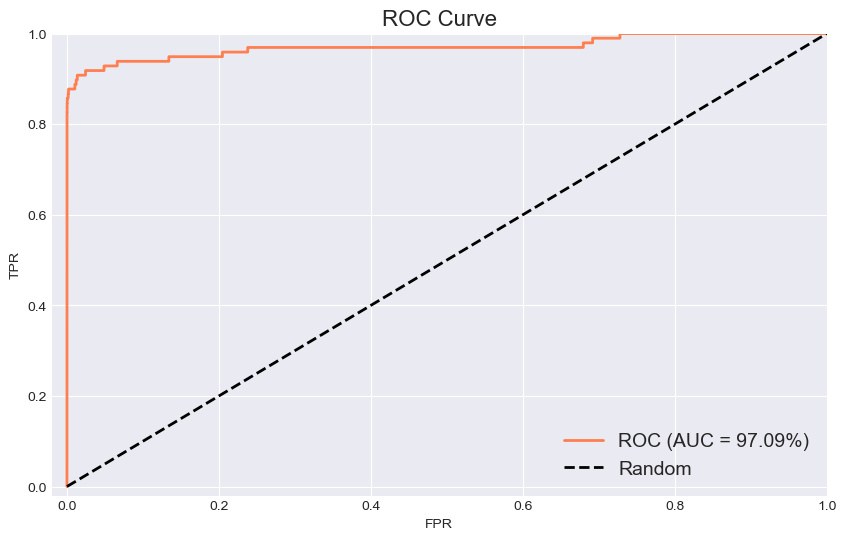


EVALUATION METRICS : RandomForestClassifier
AUC       : 97.09%
Precision : 97.37%
Recall    : 75.51%


In [24]:
clf_rf = build_randomforest_classifier(X_train, y_train, X_test, y_test,'RandomForestClassifier')


## XGBoost

In [25]:
def build_xgboost_classifier(X_train, y_train, X_test, y_test, model_name=None):
    # Instantiate the Classifier and cross validate
    # [For below configuration ruuning on full dataset it takes around 19 min to finish on 4core i7/32Gb machine]
    clf = XGBClassifier(random_state=42, verbosity=0, tree_method='hist', booster='gbtree')
    params = {'n_estimators': [100, 200, 500], 'max_depth': [2, 3, 5], 'min_samples_leaf': [2, 3, 4]}
    best_params = cross_validate_and_print_metrics(clf, X_train, y_train, params, 
                                                   verbose=1, model_name=model_name)

    # Now fit the model again with best best parameters obtained using cross-validation  
    clf = XGBClassifier(**best_params, random_state=42, verbosity=0, 
                        tree_method='hist', booster='gbtree').fit(X_train, y_train)
    metrics = evaluate_and_print_metrics(clf, X_test, y_test, model_name=model_name)

    return clf

Fitting 5 folds for each of 27 candidates, totalling 135 fits

CROSS VALIDATION METRICS : XGBClassifier
Train AUC         : 98.23% | Val AUC: 89.54%
Train Precision   : 99.61% | Val Precision: 94.95%
Train Recall      : 96.47% | Val Recall: 79.09%
----------------------------------------------------------------------------------------------------
Best Params       : {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 500}
Best AUC Score    : 89.98%



C:\Users\bitzc\AppData\Local\Temp\ipykernel_5716\3143686792.py:47: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


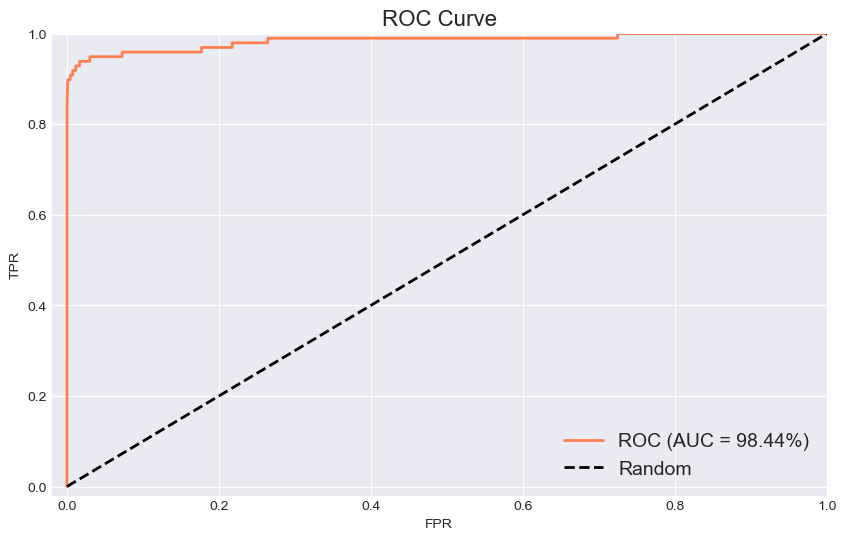


EVALUATION METRICS : XGBClassifier
AUC       : 98.44%
Precision : 97.44%
Recall    : 77.55%


In [26]:
clf_xgb = build_xgboost_classifier(X_train, y_train, X_test, y_test, 'XGBClassifier')


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 12
3rd Top var = 14


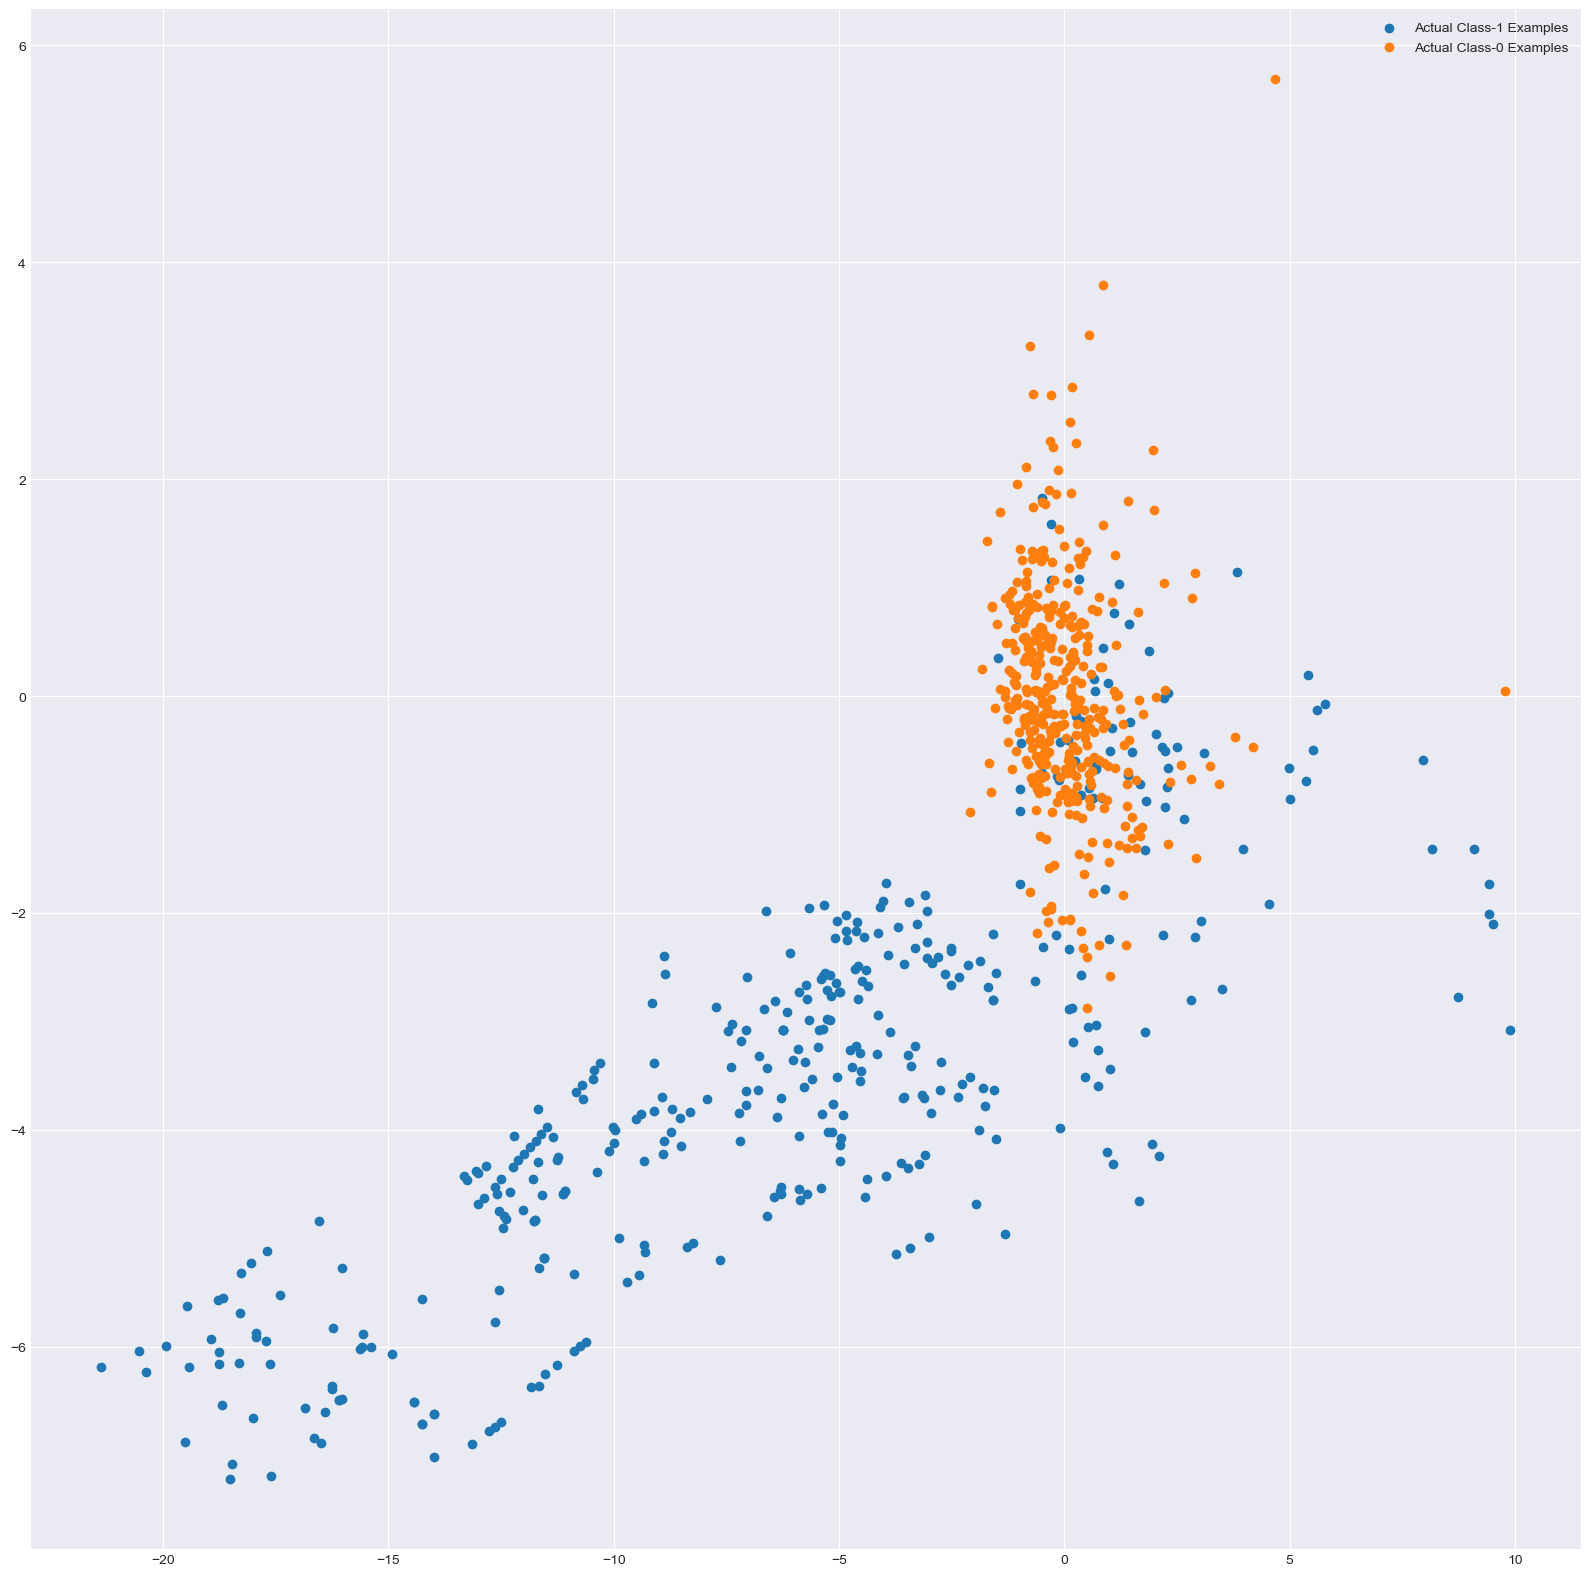

In [28]:
var_imp = []
clf = clf_rf
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Random Oversampling


Data shape - Original      : X Shape: (284807, 29) | y Shape: (284807,)
Data shape - After sampling: X Shape: (568630, 29) | y Shape: (568630,)



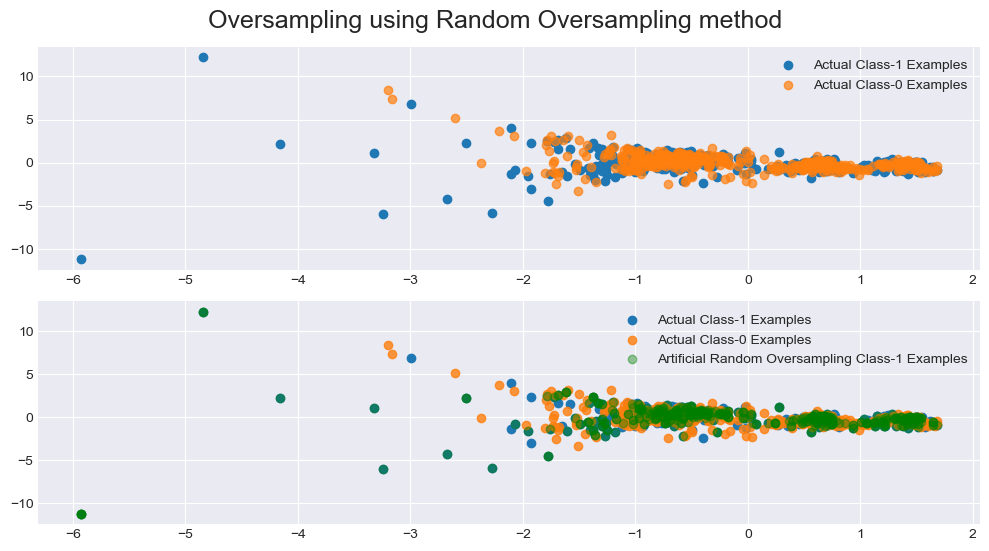

In [39]:
import warnings
warnings.filterwarnings("ignore")

using = 'Random Oversampling'
sampler = over_sampling.RandomOverSampler(random_state=0)
X_oversampled, y_oversampled = sampler.fit_resample(X.to_numpy(), y.to_numpy())
    # Artificial minority samples and corresponding minority labels from sampling-method are appended
    # below X_train and y_train respectively
    # So to exclusively get the artificial minority samples from sampling-method, we do
X_train_sampled_1 = X_oversampled[X.shape[0]:]

X_train_1 = X.to_numpy()[np.where(y==1.0)]
X_train_0 = X.to_numpy()[np.where(y==0.0)]

print()
print(f'Data shape - Original      : X Shape: {X.shape} | y Shape: {y.shape}')
print(f'Data shape - After sampling: X Shape: {X_oversampled.shape} | y Shape: {y_oversampled.shape}')
print()
fig = plt.figure(figsize=(10,8))
plt.suptitle(f'Oversampling using {using} method', fontsize=18, fontweight=2)
    
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
                label='Actual Class-0 Examples', alpha=0.7)
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
                label='Actual Class-0 Examples', alpha=0.8)
plt.scatter(X_train_sampled_1[:X_train_1.shape[0], 0], X_train_sampled_1[:X_train_1.shape[0], 1],
                label=f'Artificial {using} Class-1 Examples', color='green', alpha=0.4)
plt.legend()
    
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits

CROSS VALIDATION METRICS : LogisticRegression
Train AUC         : 54.18% | Val AUC: 54.14%
Train Precision   : 54.20% | Val Precision: 54.16%
Train Recall      : 53.68% | Val Recall: 53.63%
----------------------------------------------------------------------------------------------------
Best Params       : {'C': 1.0, 'solver': 'liblinear'}
Best AUC Score    : 54.15%



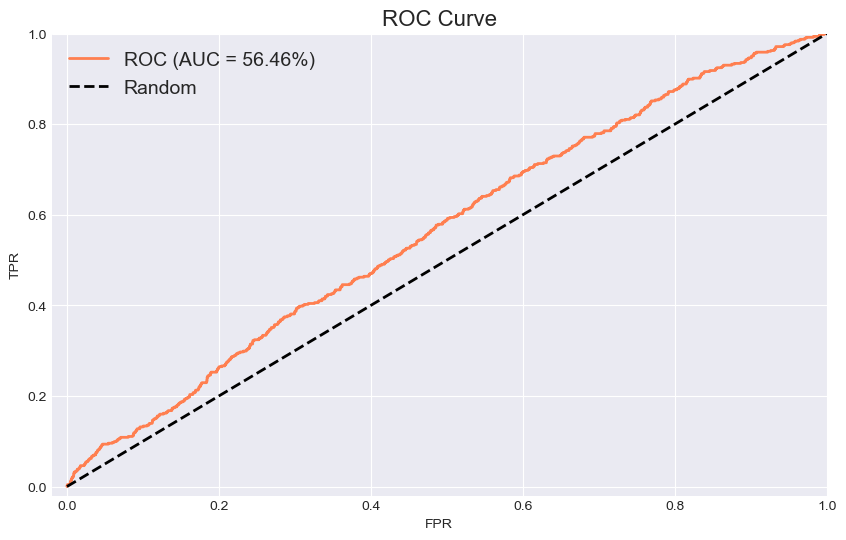


EVALUATION METRICS : LogisticRegression
AUC       : 56.46%
Precision : 54.00%
Recall    : 53.25%
Fitting 5 folds for each of 18 candidates, totalling 90 fits

CROSS VALIDATION METRICS : DecisionTreeClassifier
Train AUC         : 68.15% | Val AUC: 68.06%
Train Precision   : 63.41% | Val Precision: 63.32%
Train Recall      : 95.71% | Val Recall: 95.68%
----------------------------------------------------------------------------------------------------
Best Params       : {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2}
Best AUC Score    : 89.63%



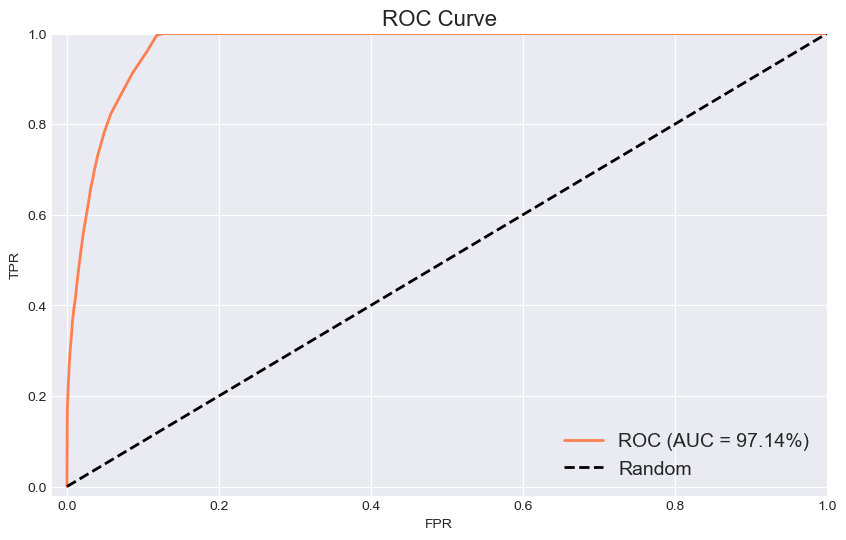


EVALUATION METRICS : DecisionTreeClassifier
AUC       : 97.14%
Precision : 89.44%
Recall    : 99.61%
Fitting 5 folds for each of 8 candidates, totalling 40 fits

CROSS VALIDATION METRICS : RandomForestClassifier
Train AUC         : 86.88% | Val AUC: 86.80%
Train Precision   : 85.14% | Val Precision: 85.05%
Train Recall      : 88.97% | Val Recall: 88.92%
----------------------------------------------------------------------------------------------------
Best Params       : {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
Best AUC Score    : 96.31%



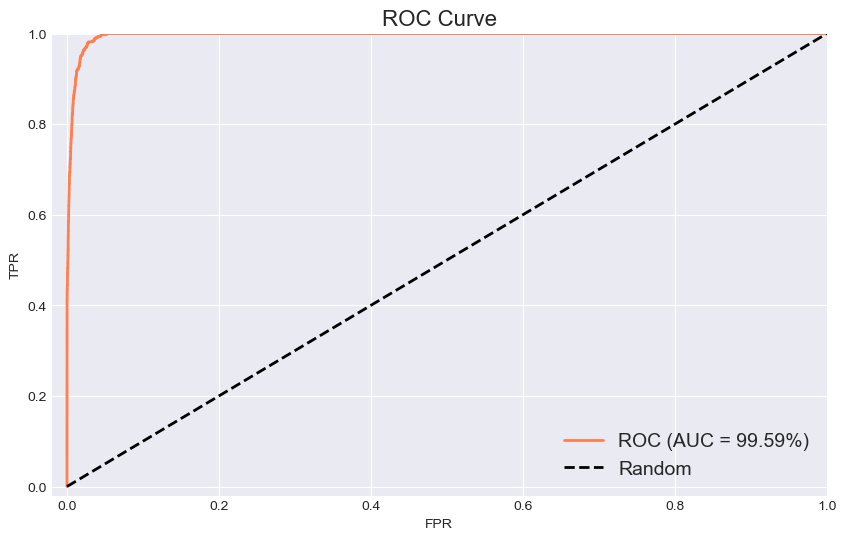


EVALUATION METRICS : RandomForestClassifier
AUC       : 99.59%
Precision : 93.48%
Recall    : 100.00%
Fitting 5 folds for each of 27 candidates, totalling 135 fits

CROSS VALIDATION METRICS : XGBClassifier
Train AUC         : 94.37% | Val AUC: 94.30%
Train Precision   : 92.15% | Val Precision: 92.04%
Train Recall      : 97.36% | Val Recall: 97.34%
----------------------------------------------------------------------------------------------------
Best Params       : {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 500}
Best AUC Score    : 99.94%



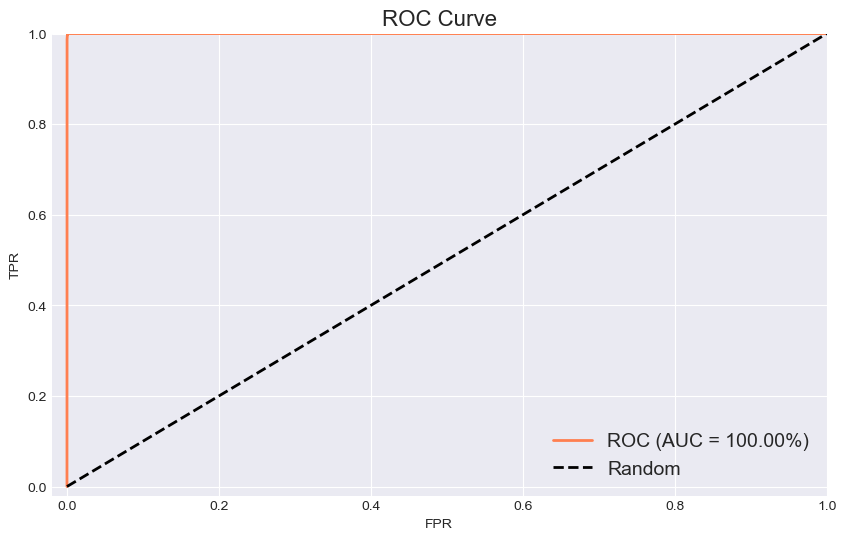


EVALUATION METRICS : XGBClassifier
AUC       : 100.00%
Precision : 99.88%
Recall    : 100.00%


In [40]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)
#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

#LogisticRegression
clf_lr_rm = build_logit_classifier(X_train, y_train, X_test, y_test, 'LogisticRegression')

#DecisionTreeClassifier
clf_dt_rm = build_decisiontree_classifier(X_train, y_train, X_test, y_test, 'DecisionTreeClassifier')

#RandomForestClassifier
clf_rf_rm = build_randomforest_classifier(X_train, y_train, X_test, y_test,'RandomForestClassifier')

#XGBClassifier
clf_xgb_rm = build_xgboost_classifier(X_train, y_train, X_test, y_test, 'XGBClassifier')

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- SVM
- Decision Tree
- Random Forest
- XGBoost

### Print the class distribution after applying SMOTE 


Data shape - Original      : X Shape: (284807, 29) | y Shape: (284807,)
Data shape - After sampling: X Shape: (568630, 29) | y Shape: (568630,)



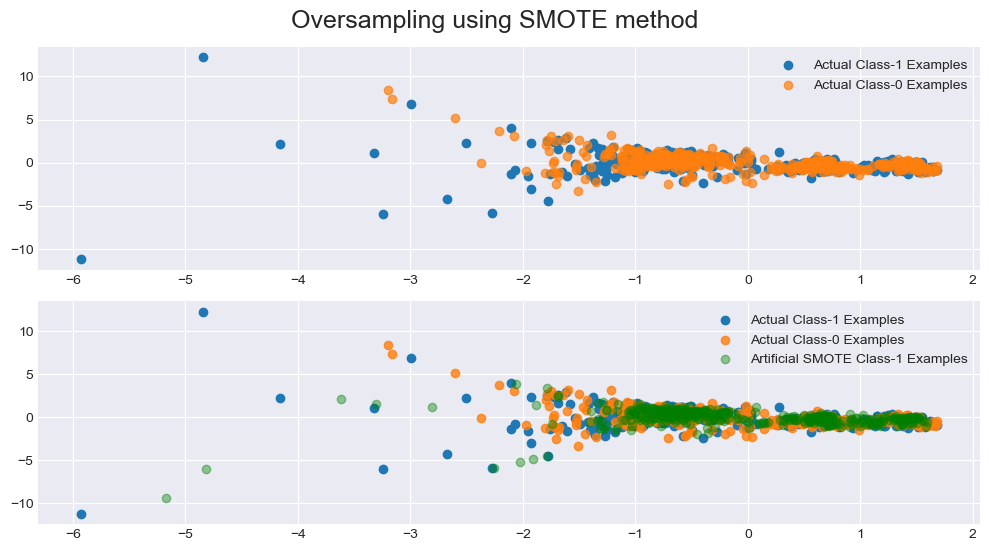

In [41]:
import warnings
warnings.filterwarnings("ignore")


using = 'SMOTE'
sampler = over_sampling.SMOTE(random_state=0)
X_oversampled, y_oversampled = sampler.fit_resample(X.to_numpy(), y.to_numpy())
    # Artificial minority samples and corresponding minority labels from sampling-method are appended
    # below X_train and y_train respectively
    # So to exclusively get the artificial minority samples from sampling-method, we do
X_train_sampled_1 = X_oversampled[X.shape[0]:]

X_train_1 = X.to_numpy()[np.where(y==1.0)]
X_train_0 = X.to_numpy()[np.where(y==0.0)]

print()
print(f'Data shape - Original      : X Shape: {X.shape} | y Shape: {y.shape}')
print(f'Data shape - After sampling: X Shape: {X_oversampled.shape} | y Shape: {y_oversampled.shape}')
print()
fig = plt.figure(figsize=(10,8))
plt.suptitle(f'Oversampling using {using} method', fontsize=18, fontweight=2)
    
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
                label='Actual Class-0 Examples', alpha=0.7)
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
                label='Actual Class-0 Examples', alpha=0.8)
plt.scatter(X_train_sampled_1[:X_train_1.shape[0], 0], X_train_sampled_1[:X_train_1.shape[0], 1],
                label=f'Artificial {using} Class-1 Examples', color='green', alpha=0.4)
plt.legend()
    
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits

CROSS VALIDATION METRICS : LogisticRegression
Train AUC         : 57.45% | Val AUC: 57.42%
Train Precision   : 56.56% | Val Precision: 56.53%
Train Recall      : 64.00% | Val Recall: 63.98%
----------------------------------------------------------------------------------------------------
Best Params       : {'C': 0.25, 'solver': 'lbfgs'}
Best AUC Score    : 57.42%



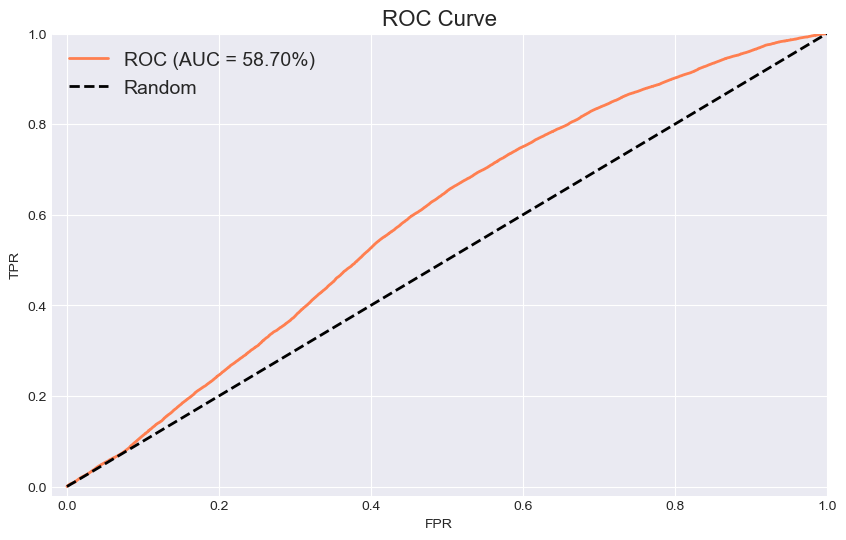


EVALUATION METRICS : LogisticRegression
AUC       : 58.70%
Precision : 56.70%
Recall    : 64.20%
Fitting 5 folds for each of 18 candidates, totalling 90 fits

CROSS VALIDATION METRICS : DecisionTreeClassifier
Train AUC         : 77.17% | Val AUC: 76.71%
Train Precision   : 72.81% | Val Precision: 72.31%
Train Recall      : 89.07% | Val Recall: 88.77%
----------------------------------------------------------------------------------------------------
Best Params       : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2}
Best AUC Score    : 92.65%



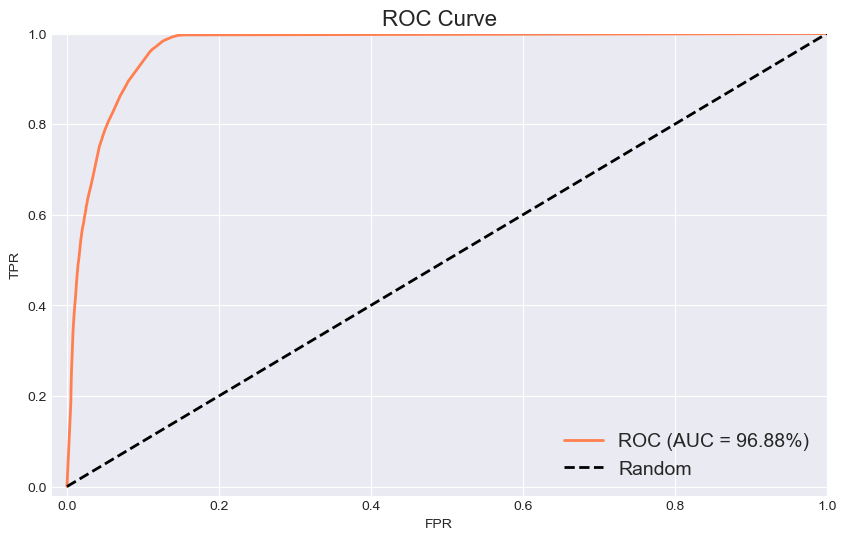


EVALUATION METRICS : DecisionTreeClassifier
AUC       : 96.88%
Precision : 88.50%
Recall    : 98.55%
Fitting 5 folds for each of 8 candidates, totalling 40 fits

CROSS VALIDATION METRICS : RandomForestClassifier
Train AUC         : 79.21% | Val AUC: 79.01%
Train Precision   : 74.22% | Val Precision: 74.04%
Train Recall      : 88.98% | Val Recall: 88.77%
----------------------------------------------------------------------------------------------------
Best Params       : {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 200}
Best AUC Score    : 87.78%



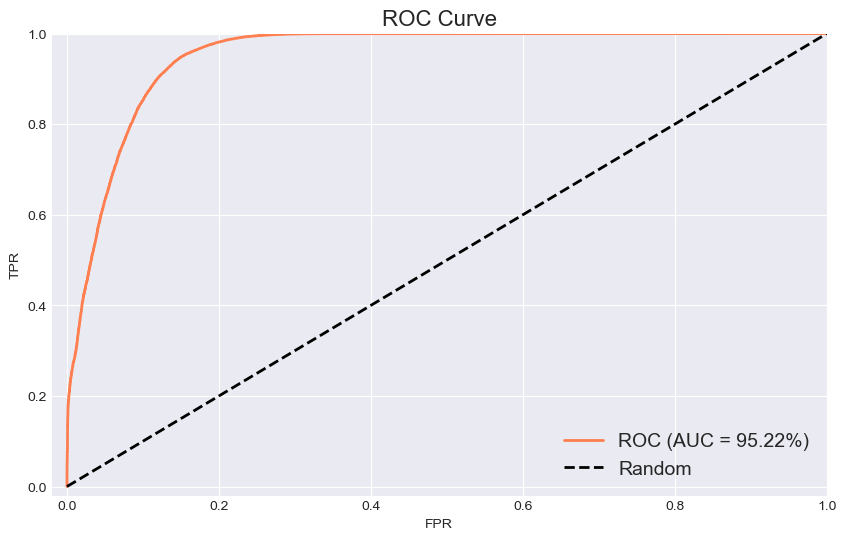


EVALUATION METRICS : RandomForestClassifier
AUC       : 95.22%
Precision : 80.55%
Recall    : 99.38%
Fitting 5 folds for each of 27 candidates, totalling 135 fits

CROSS VALIDATION METRICS : XGBClassifier
Train AUC         : 89.24% | Val AUC: 88.98%
Train Precision   : 86.41% | Val Precision: 86.07%
Train Recall      : 93.58% | Val Recall: 93.44%
----------------------------------------------------------------------------------------------------
Best Params       : {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 500}
Best AUC Score    : 99.40%



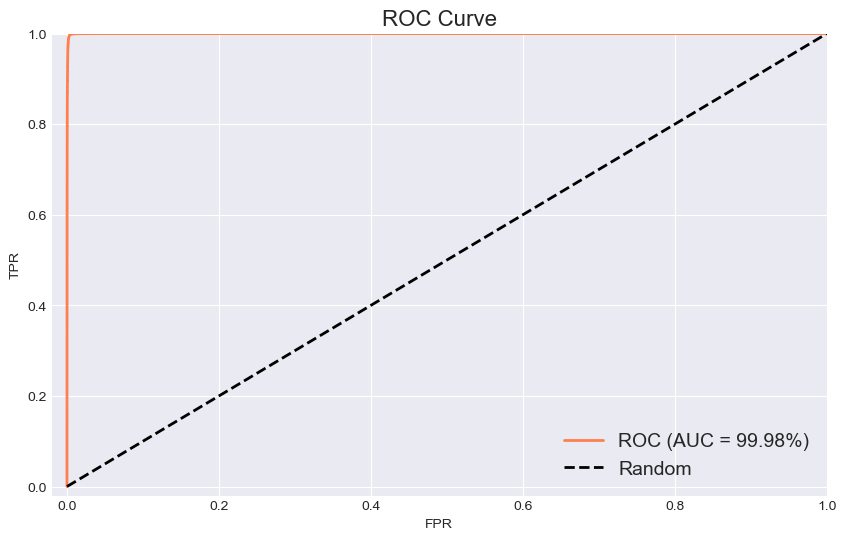


EVALUATION METRICS : XGBClassifier
AUC       : 99.98%
Precision : 98.85%
Recall    : 99.97%


In [42]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)
#perform cross validation & then balance classes on X_train_cv & y_train_cv using SMOTE

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters
# all are together

#LogisticRegression
clf_lr_smote = build_logit_classifier(X_train, y_train, X_test, y_test, 'LogisticRegression')

#DecisionTreeClassifier
clf_dt_smote = build_decisiontree_classifier(X_train, y_train, X_test, y_test, 'DecisionTreeClassifier')

#RandomForestClassifier
clf_rf_smote = build_randomforest_classifier(X_train, y_train, X_test, y_test,'RandomForestClassifier')

#XGBClassifier
clf_xgb_smote = build_xgboost_classifier(X_train, y_train, X_test, y_test, 'XGBClassifier')


##### Build models on other algorithms to see the better performing on SMOTE

### Print the class distribution after applying ADASYN


Data shape - Original      : X Shape: (284807, 29) | y Shape: (284807,)
Data shape - After sampling: X Shape: (568811, 29) | y Shape: (568811,)



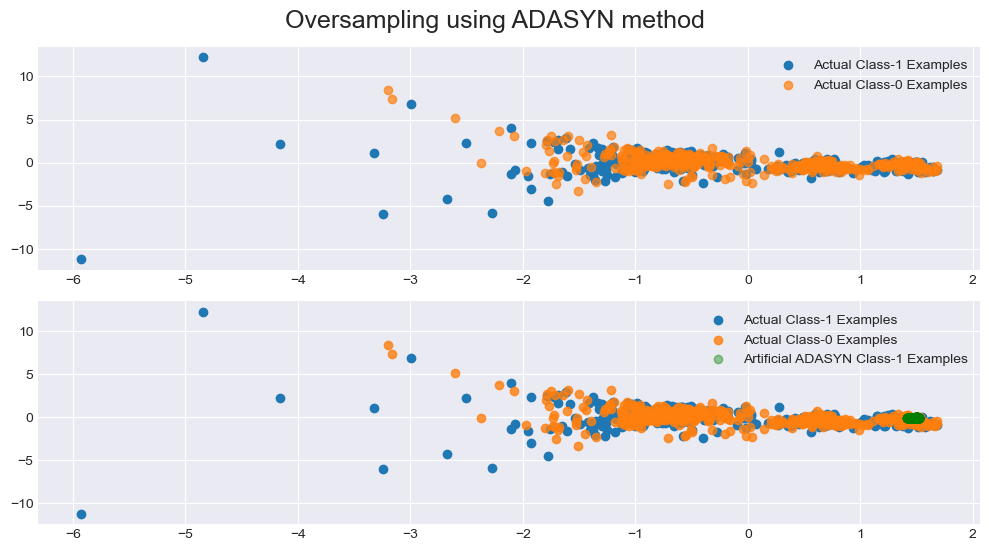

In [43]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

using = 'ADASYN'
sampler = over_sampling.ADASYN(random_state=0)
X_oversampled, y_oversampled = sampler.fit_resample(X.to_numpy(), y.to_numpy())
    # Artificial minority samples and corresponding minority labels from sampling-method are appended
    # below X_train and y_train respectively
    # So to exclusively get the artificial minority samples from sampling-method, we do
X_train_sampled_1 = X_oversampled[X.shape[0]:]

X_train_1 = X.to_numpy()[np.where(y==1.0)]
X_train_0 = X.to_numpy()[np.where(y==0.0)]

print()
print(f'Data shape - Original      : X Shape: {X.shape} | y Shape: {y.shape}')
print(f'Data shape - After sampling: X Shape: {X_oversampled.shape} | y Shape: {y_oversampled.shape}')
print()
fig = plt.figure(figsize=(10,8))
plt.suptitle(f'Oversampling using {using} method', fontsize=18, fontweight=2)
    
plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
                label='Actual Class-0 Examples', alpha=0.7)
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], 
                label='Actual Class-0 Examples', alpha=0.8)
plt.scatter(X_train_sampled_1[:X_train_1.shape[0], 0], X_train_sampled_1[:X_train_1.shape[0], 1],
                label=f'Artificial {using} Class-1 Examples', color='green', alpha=0.4)
plt.legend()
    
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 6 candidates, totalling 30 fits

CROSS VALIDATION METRICS : LogisticRegression
Train AUC         : 57.52% | Val AUC: 57.49%
Train Precision   : 56.67% | Val Precision: 56.65%
Train Recall      : 64.03% | Val Recall: 63.98%
----------------------------------------------------------------------------------------------------
Best Params       : {'C': 0.5, 'solver': 'liblinear'}
Best AUC Score    : 57.49%



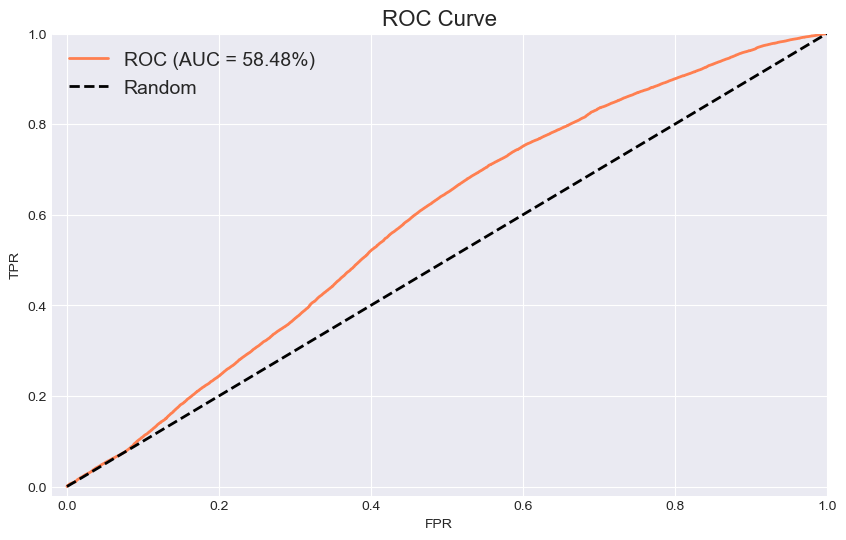


EVALUATION METRICS : LogisticRegression
AUC       : 58.48%
Precision : 56.56%
Recall    : 63.95%
Fitting 5 folds for each of 18 candidates, totalling 90 fits

CROSS VALIDATION METRICS : DecisionTreeClassifier
Train AUC         : 77.24% | Val AUC: 76.77%
Train Precision   : 72.72% | Val Precision: 72.22%
Train Recall      : 89.72% | Val Recall: 89.42%
----------------------------------------------------------------------------------------------------
Best Params       : {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 2}
Best AUC Score    : 92.19%



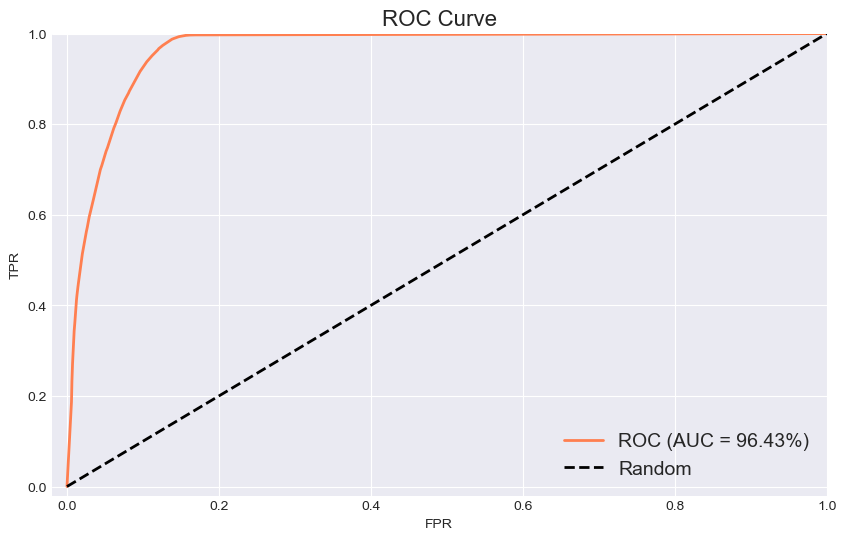


EVALUATION METRICS : DecisionTreeClassifier
AUC       : 96.43%
Precision : 87.90%
Recall    : 98.52%
Fitting 5 folds for each of 8 candidates, totalling 40 fits

CROSS VALIDATION METRICS : RandomForestClassifier
Train AUC         : 79.40% | Val AUC: 79.20%
Train Precision   : 74.39% | Val Precision: 74.22%
Train Recall      : 89.22% | Val Recall: 89.02%
----------------------------------------------------------------------------------------------------
Best Params       : {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
Best AUC Score    : 87.84%



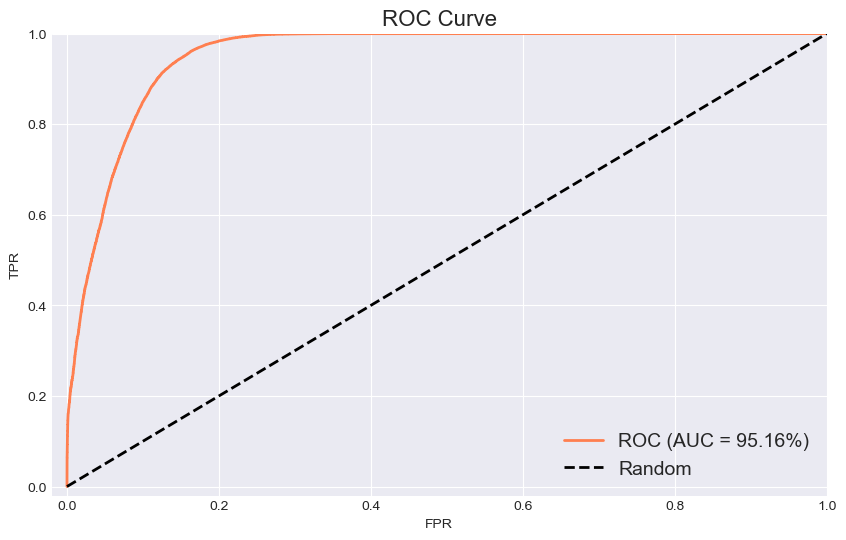


EVALUATION METRICS : RandomForestClassifier
AUC       : 95.16%
Precision : 80.66%
Recall    : 99.42%
Fitting 5 folds for each of 27 candidates, totalling 135 fits

CROSS VALIDATION METRICS : XGBClassifier
Train AUC         : 89.29% | Val AUC: 89.03%
Train Precision   : 86.49% | Val Precision: 86.16%
Train Recall      : 93.57% | Val Recall: 93.41%
----------------------------------------------------------------------------------------------------
Best Params       : {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 500}
Best AUC Score    : 99.40%



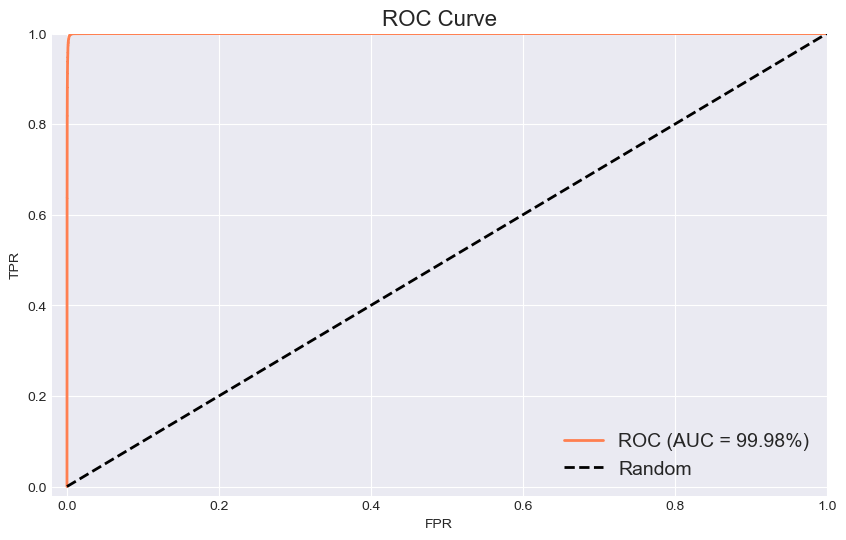


EVALUATION METRICS : XGBClassifier
AUC       : 99.98%
Precision : 98.93%
Recall    : 99.98%


In [44]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)
#perform cross validation & then balance classes on X_train_cv & y_train_cv using ADASYN

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

#LogisticRegression
clf_lr_adasyn = build_logit_classifier(X_train, y_train, X_test, y_test, 'LogisticRegression')

#DecisionTreeClassifier
clf_dt_adasyn = build_decisiontree_classifier(X_train, y_train, X_test, y_test, 'DecisionTreeClassifier')

#RandomForestClassifier
clf_rf_adasyn = build_randomforest_classifier(X_train, y_train, X_test, y_test,'RandomForestClassifier')

#XGBClassifier
clf_xgb_adasyn = build_xgboost_classifier(X_train, y_train, X_test, y_test, 'XGBClassifier')


##### Build models on other algorithms to see the better performing on ADASYN

### Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Print the important features of the best model to understand the dataset

In [47]:
X_train

array([[-0.78994361,  0.73022133,  0.85510235, ..., -0.12204125,
         0.00929648, -0.30969343],
       [-0.65489822,  0.69545713,  0.43917107, ..., -0.12787694,
         0.02185423, -0.70218045],
       [ 1.46217928,  0.09381378, -1.56909286, ..., -0.27502287,
        -0.13417344,  0.24674532],
       ...,
       [-0.5998106 ,  0.62710263,  0.44169541, ..., -0.09421101,
        -0.00530937, -0.79194979],
       [-0.78374211,  0.60586777,  1.24133372, ...,  0.76493652,
         0.36609877,  0.10189591],
       [-0.22716405,  0.64547906,  0.13999273, ...,  0.56024493,
         0.29331854, -1.31329525]])

Top var = 29
2nd Top var = 24
3rd Top var = 13


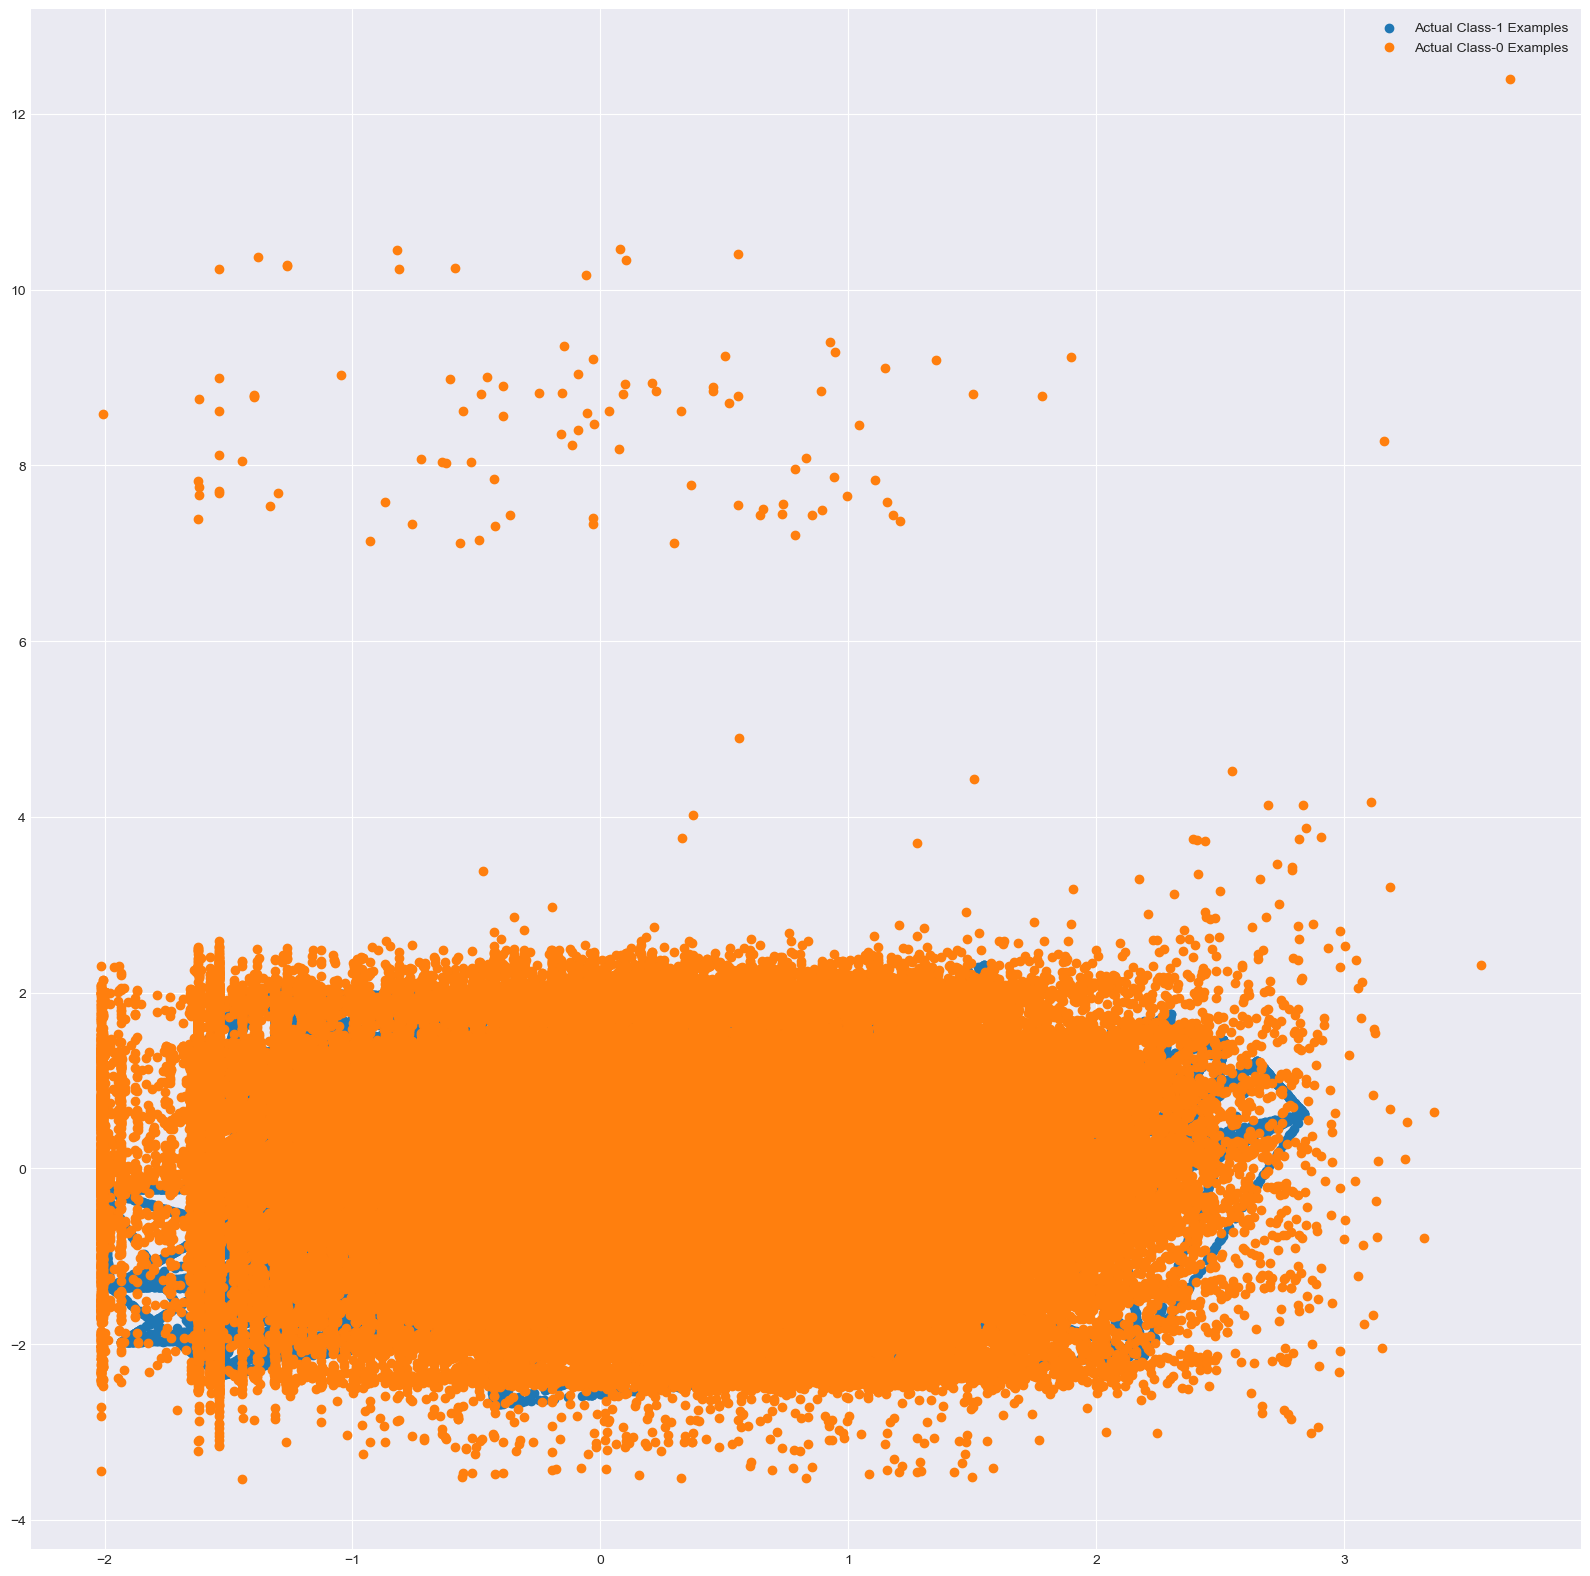

In [48]:
var_imp = []
clf = clf_xgb_adasyn
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train[np.where(y_train==1.0)]
X_train_0 = X_train[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve

In [54]:
# By refering above we can see that best model is XGBoost with randome oversampling with below params

print('Best Params       : {max_depth: 5, min_samples_leaf: 2, n_estimators: 500}')
print('Best AUC Score    : 99.94%')
    
print('EVALUATION METRICS : XGBClassifier')
print('====================================================================================================')
print('AUC       : 100.00%%')
print('Precision : 99.88%')
print('Recall    : 100.00%%')

Best Params       : {max_depth: 5, min_samples_leaf: 2, n_estimators: 500}
Best AUC Score    : 99.94%
EVALUATION METRICS : XGBClassifier
AUC       : 100.00%%
Precision : 99.88%
Recall    : 100.00%%
